In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!unrar x drive/MyDrive/sorted_data.rar

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
Extracting  sorted_data/train/scab/a10782c3de6f75b0.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a11a9ec3d805677e.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a12cde80caedc557.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a13f87e591dfa108.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a15a6aeb3ceb1521.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a16c934ba6cc9cec.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a16ec5864adea78c.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a186c6d87a212fcf.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a1874e8c18f95be3.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a18af4fb4b83f890.jpg                   72%  OK 
Extracting  sor

In [ ]:
img_height, img_width = 128, 128
batch_size = 40

train_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 16632 files belonging to 12 classes.
Found 1000 files belonging to 12 classes.
Found 1000 files belonging to 12 classes.


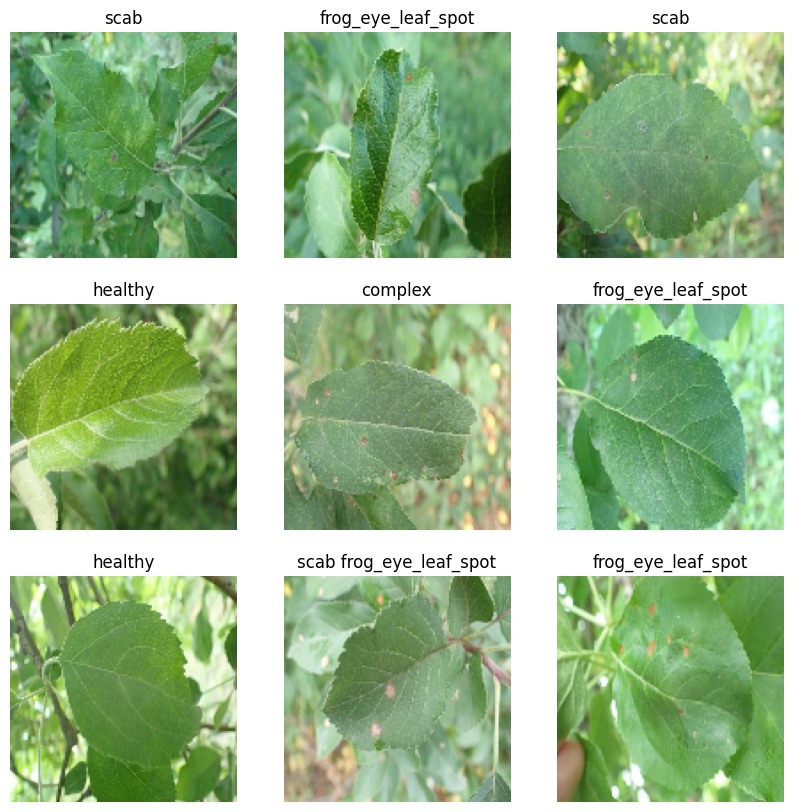

In [ ]:
class_names = ["complex", "frog_eye_leaf_spot", "frog_eye_leaf_spot complex", "healthy", "powdery_mildew", "powdery_mildew complex", "rust", "rust complex", "rust frog_eye_leaf_spot", "scab", "scab frog_eye_leaf_spot", "scab frog_eye_leaf_spot complex"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(12)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
416/416 [==============================] - 61s 117ms/step - loss: 1.6644 - accuracy: 0.3850 - val_loss: 1.4733 - val_accuracy: 0.4800
Epoch 2/10
416/416 [==============================] - 43s 103ms/step - loss: 1.2769 - accuracy: 0.5556 - val_loss: 1.1492 - val_accuracy: 0.5800
Epoch 3/10
416/416 [==============================] - 42s 100ms/step - loss: 1.0429 - accuracy: 0.6291 - val_loss: 1.0559 - val_accuracy: 0.6420
Epoch 4/10
416/416 [==============================] - 43s 102ms/step - loss: 0.9003 - accuracy: 0.6815 - val_loss: 1.0533 - val_accuracy: 0.6340
Epoch 5/10
416/416 [==============================] - 46s 108ms/step - loss: 0.7667 - accuracy: 0.7302 - val_loss: 1.0578 - val_accuracy: 0.6610
Epoch 6/10
416/416 [==============================] - 45s 106ms/step - loss: 0.6243 - accuracy: 0.7784 - val_loss: 1.0366 - val_accuracy: 0.6700
Epoch 7/10
416/416 [==============================] - 48s 112ms/step - loss: 0.5049 - accuracy: 0.8223 - val_loss: 1.1064 - val_ac

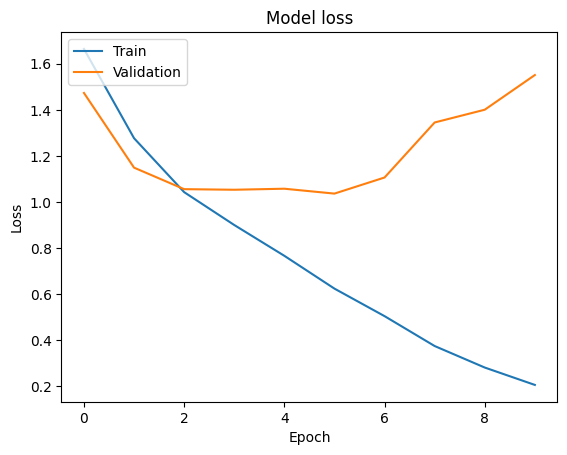

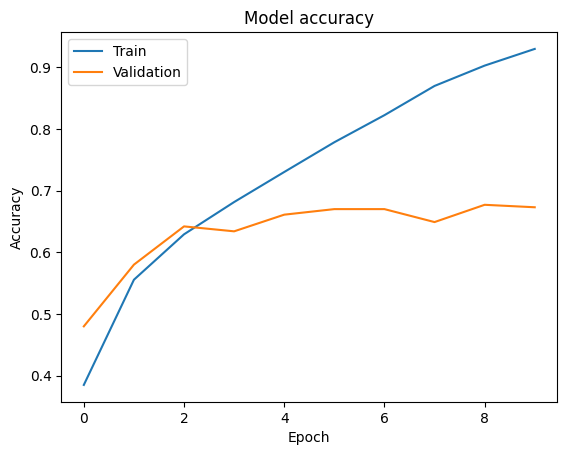

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_ds)

25/25 [==============================] - 4s 98ms/step - loss: 1.3303 - accuracy: 0.6940


[1.3303263187408447, 0.6940000057220459]

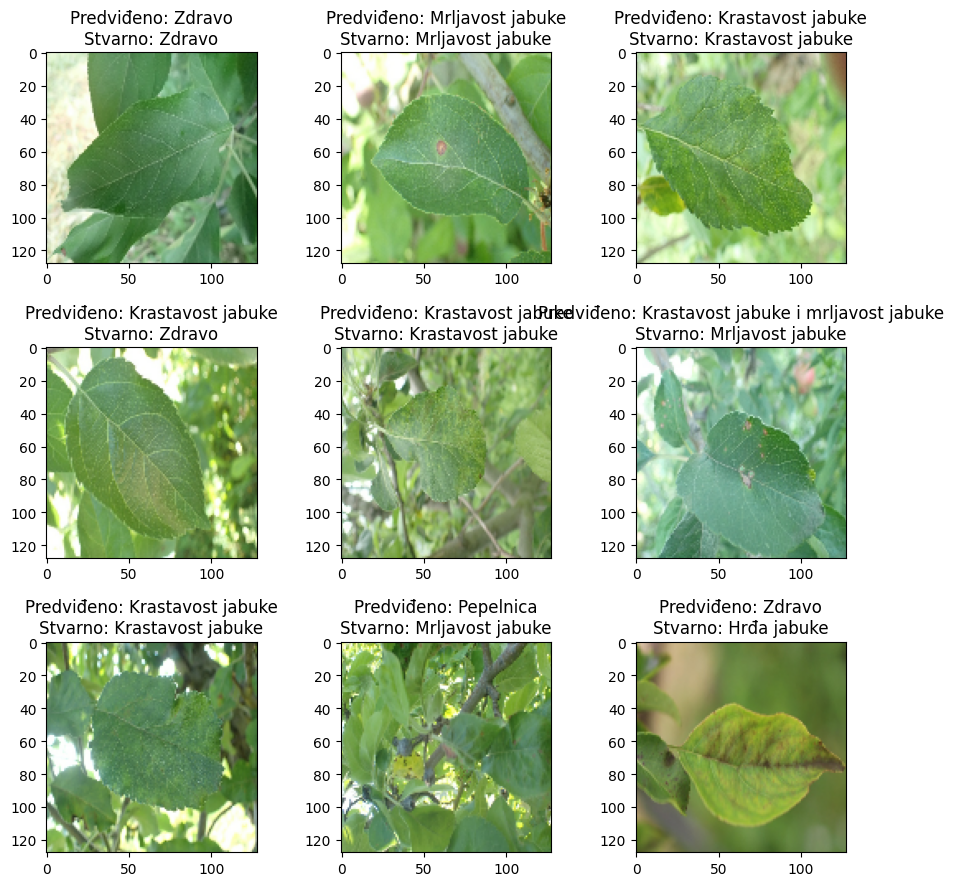

In [ ]:
import numpy
class_names = ["Preteško za odrediti", "Mrljavost jabuke", "Teško je prepoznati, ali mrljavost jabuke je najvjerojatnija bolest", "Zdravo", "Pepelnica", "Teško je prepoznati, ali pepelnica je najvjerojatnija bolest", "Hrđa jabuke", "Teško je prepoznati, ali hrđa jabuke je najvjerojatnija bolest", "Hrđa jabuke i mrljavost jabuke", "Krastavost jabuke", "Krastavost jabuke i mrljavost jabuke", "Teško je prepoznati, ali krastavost jabuke i mrljavost jabuke su najvjerojatnije bolesti"]

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)  # Adjust margins and spacing
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Predviđeno: " + class_names[index] + "\nStvarno: " + class_names[labels[i]])

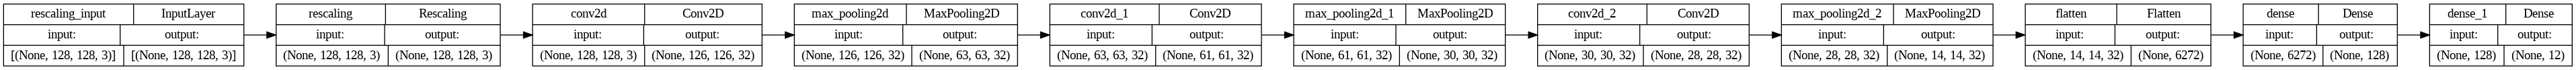

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True, rankdir='LR')
Image('model.png')

25/25 [==============================] - 2s 58ms/step
Confusion Matrix:


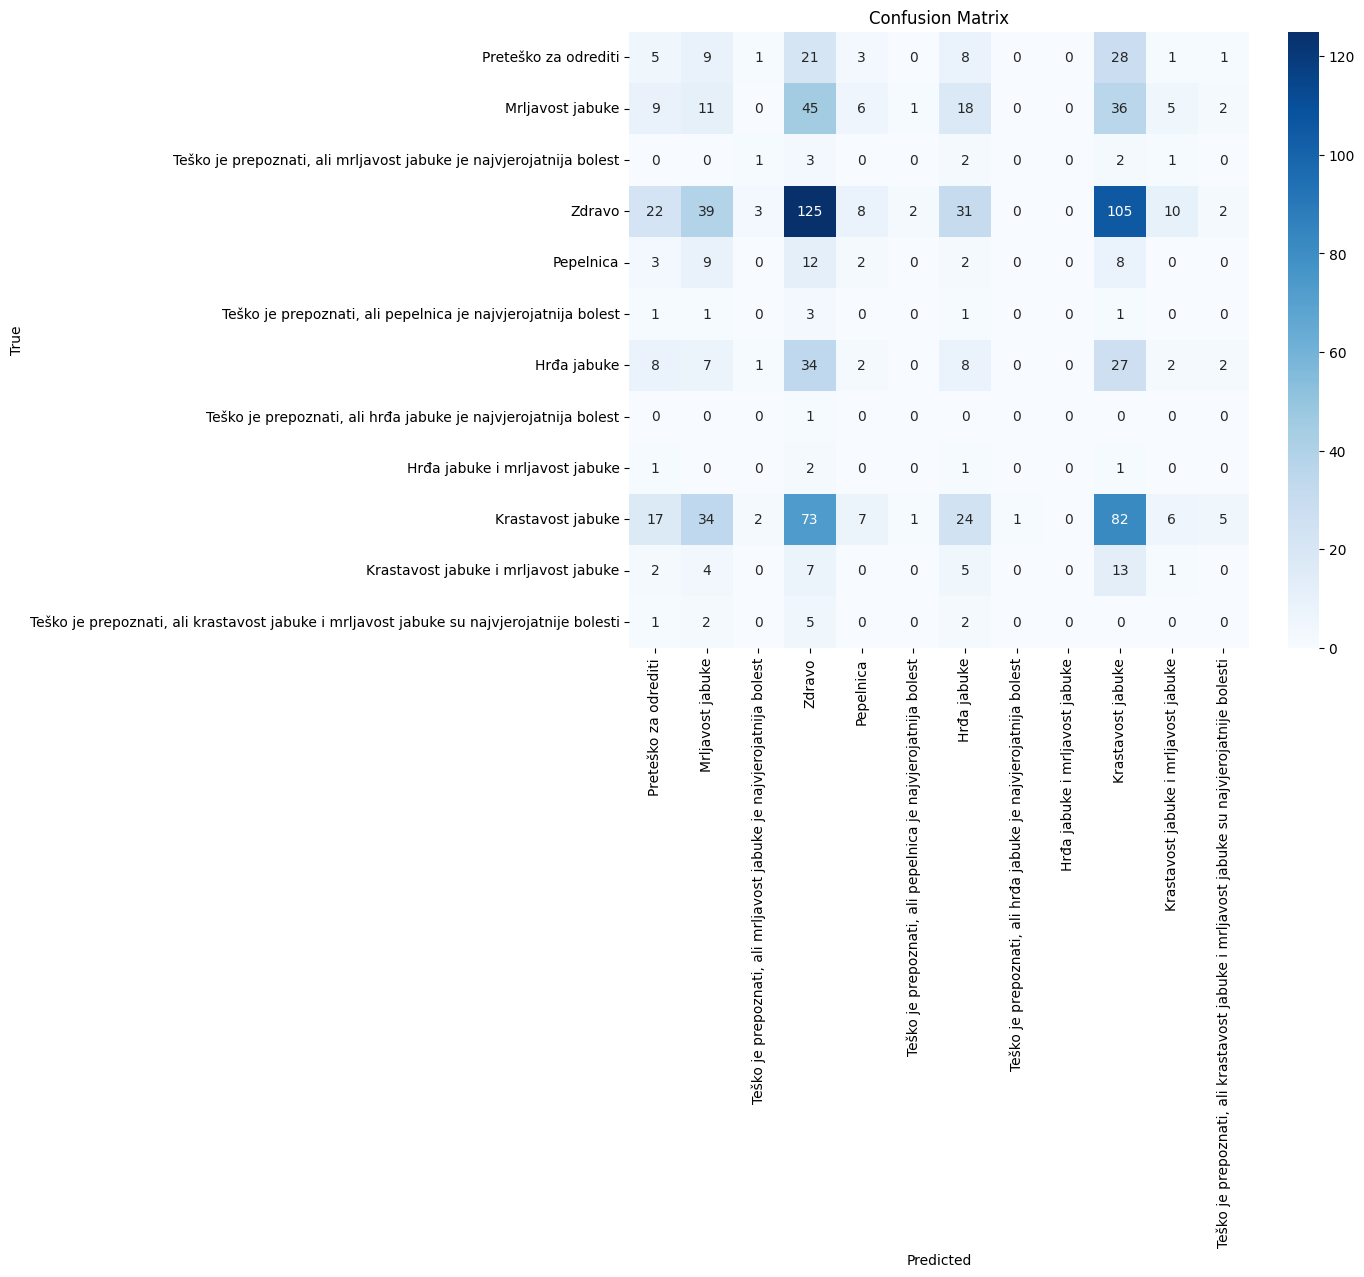

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#class_names = ["complex", "frog_eye_leaf_spot", "frog_eye_leaf_spot complex", "healthy", "powdery_mildew", "powdery_mildew complex", "rust", "rust complex", "rust frog_eye_leaf_spot", "scab", "scab frog_eye_leaf_spot", "scab frog_eye_leaf_spot complex"]


predictions = model.predict(test_ds)
predicted_labels = numpy.argmax(predictions, axis=1)
true_labels = numpy.concatenate([y for x, y in test_ds], axis=0)

confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
#print(confusion_mat)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()